In [1]:
pip install igorpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 15.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for airr: filename=airr-1.5.1-py3-none-any.whl size=47267 sha256=ff6f8957efc9f4d18afcea00f0bd13db2a51b9170c339e43142c287b685083cc
  Stored in directory: /Users/kaiming/Library/Caches/pip/wheels/fa/8c/72/b615e752f28dbaaaffbf614c36a8fb885c3307a4ffd53fa8b9
Successfully built airr
ERROR: For req: igorpy. Invalid script entry point: <ExportEntry pygor3-igor-entry = pygor3.scripts.igor:None []> - A callable suffix is required. Cf https://packaging.python.org/specifications/entry-points/#use-for-scripts for more information.
Note: you may need to restart the kernel to use updated packages.


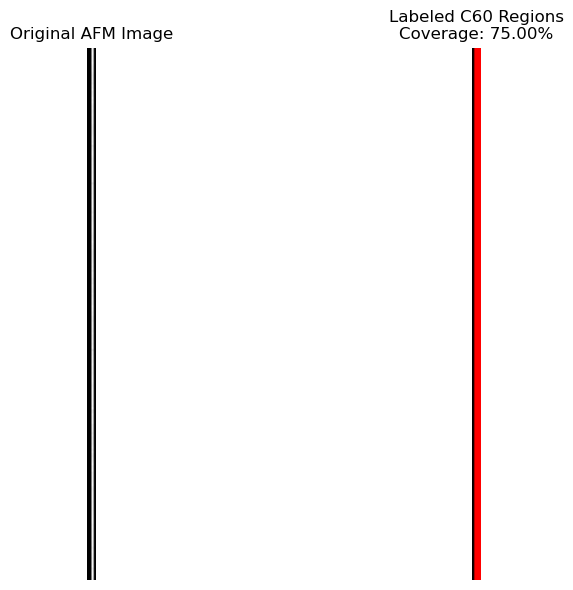

覆盖率: 75.00%


0.75

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from igor2 import binarywave
from skimage import filters, measure, morphology, color

# 读取 IBW 文件
def read_ibw_igor2(file_path):
    with open(file_path, 'rb') as f:
        wave = binarywave.load(f)
    data = wave['wave']['wData']
    if data.ndim == 2:
        return data
    elif data.ndim == 3:
        return data[0]  # 取第一个通道
    else:
        raise ValueError(f"Unexpected IBW data shape: {data.shape}")

# 图像分析函数
def analyze_afm(data):
    norm_data = (data - np.min(data)) / (np.max(data) - np.min(data))  # 归一化
    smoothed = filters.gaussian(norm_data, sigma=1)  # 高斯滤波去噪

    thresh = filters.threshold_otsu(smoothed)  # Otsu 阈值
    binary = smoothed > thresh

    cleaned = morphology.remove_small_objects(binary, min_size=50)  # 移除小物体
    labeled = measure.label(cleaned)

    # RGB 伪彩色图像
    colored_labels = color.label2rgb(labeled, bg_label=0)
    colored_labels_uint8 = (colored_labels * 255).astype(np.uint8)

    coverage = np.sum(cleaned) / norm_data.size
    return norm_data, colored_labels_uint8, coverage

# 显示图像函数
def show_images(original, labeled_img, coverage, save_prefix=None):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original AFM Image')

    axes[1].imshow(labeled_img)
    axes[1].set_title(f'Labeled C60 Regions\nCoverage: {coverage:.2%}')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    if save_prefix:
        plt.savefig(f"{save_prefix}_afm_analysis.png", dpi=300)
    plt.show()

# 主函数
def process_ibw_file(file_path):
    data = read_ibw_igor2(file_path)
    original, labeled_img, coverage = analyze_afm(data)
    show_images(original, labeled_img, coverage)
    print(f"覆盖率: {coverage:.2%}")
    return coverage

# 用法示例
process_ibw_file("center0000.ibw")


[DEBUG] IBW 数据 shape: (256, 256, 4)
[DEBUG] labeled shape: (256, 4)
[DEBUG] colored_labels shape: (256, 4, 3)


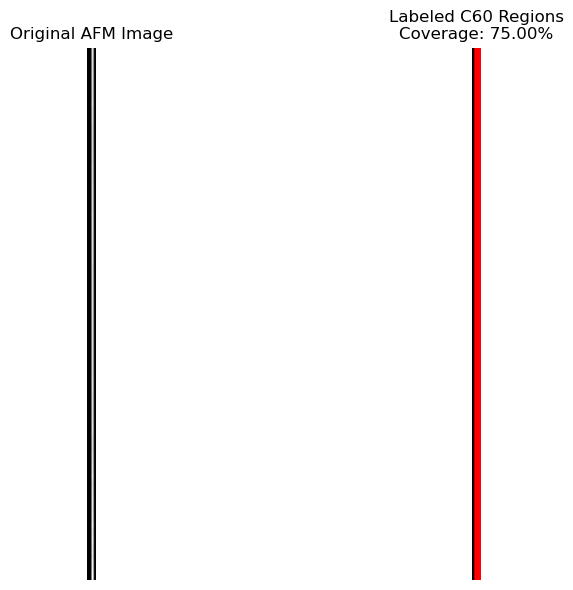

覆盖率: 75.00%


0.75

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from igor2 import binarywave
from skimage import filters, measure, morphology, color

# 读取 IBW 文件
def read_ibw_igor2(file_path):
    with open(file_path, 'rb') as f:
        wave = binarywave.load(f)
    data = wave['wave']['wData']
    print(f"[DEBUG] IBW 数据 shape: {data.shape}")
    if data.ndim == 2:
        return data
    elif data.ndim == 3:
        return data[0]  # 取第一个通道
    else:
        raise ValueError(f"Unexpected IBW data shape: {data.shape}")

# 图像分析函数
def analyze_afm(data):
    norm_data = (data - np.min(data)) / (np.max(data) - np.min(data))  # 归一化
    smoothed = filters.gaussian(norm_data, sigma=1)

    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    cleaned = morphology.remove_small_objects(binary, min_size=50)
    labeled = measure.label(cleaned)

    # 转换为 RGB 彩色图
    colored_labels = color.label2rgb(labeled, bg_label=0)

    print(f"[DEBUG] labeled shape: {labeled.shape}")
    print(f"[DEBUG] colored_labels shape: {colored_labels.shape}")  # 应该是 (H, W, 3)

    coverage = np.sum(cleaned) / norm_data.size
    return norm_data, colored_labels, coverage

# 显示图像
def show_images(original, labeled_img, coverage, save_prefix=None):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original AFM Image')

    axes[1].imshow(labeled_img)
    axes[1].set_title(f'Labeled C60 Regions\nCoverage: {coverage:.2%}')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    if save_prefix:
        plt.savefig(f"{save_prefix}_afm_analysis.png", dpi=300)
    plt.show()

# 主函数
def process_ibw_file(file_path):
    data = read_ibw_igor2(file_path)
    original, labeled_img, coverage = analyze_afm(data)
    show_images(original, labeled_img, coverage)
    print(f"覆盖率: {coverage:.2%}")
    return coverage

# 执行分析
process_ibw_file("Change_Me0109.ibw")


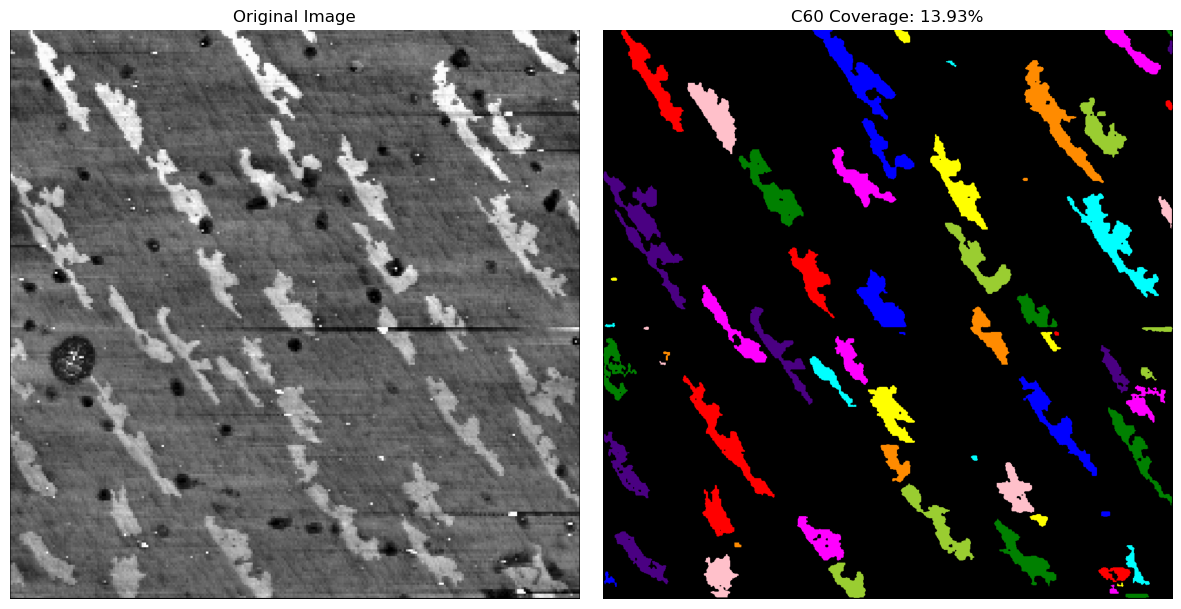

Coverage: 13.93%


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color

def analyze_afm_png(image_path):
    # Load image in grayscale
    image = io.imread(image_path, as_gray=True)

    # Normalize image to [0, 1]
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Apply Gaussian smoothing
    smoothed = filters.gaussian(norm_image, sigma=1)

    # Apply Otsu's thresholding
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Remove small objects (noise)
    cleaned = morphology.remove_small_objects(binary, min_size=50)

    # Label connected regions
    labeled = measure.label(cleaned)

    # Convert label matrix to RGB image for visualization
    colored_labels = color.label2rgb(labeled, bg_label=0)

    # Calculate coverage ratio
    coverage = np.sum(cleaned) / cleaned.size

    # Plot original image and labeled result
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(norm_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(colored_labels)
    axes[1].set_title(f"C60 Coverage: {coverage:.2%}")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

    return coverage

# Example usage (replace with your actual file name)
coverage = analyze_afm_png("Change_Me0112.png")
print(f"Coverage: {coverage:.2%}")


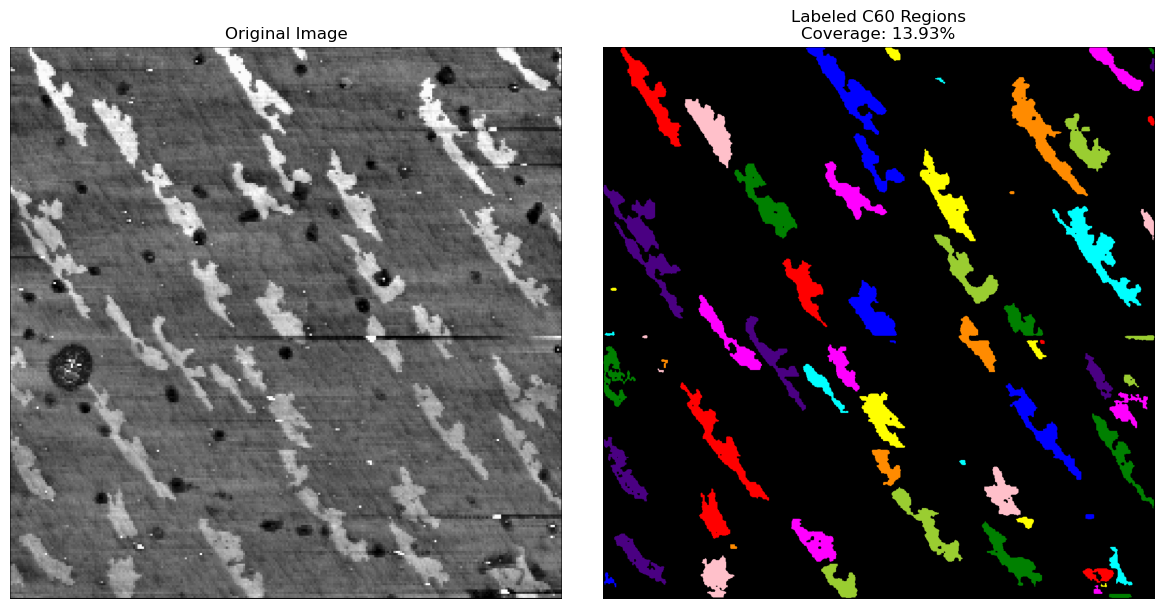

Saved result to: Change_Me0112_13_93_coverage.png


0.139320987654321

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color
import os

def analyze_afm_png(image_path):
    # Load image in grayscale
    image = io.imread(image_path, as_gray=True)

    # Normalize image to [0, 1]
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Apply Gaussian smoothing to reduce noise
    smoothed = filters.gaussian(norm_image, sigma=1)

    # Apply Otsu thresholding to separate C60 from background
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Remove small noise-like regions
    cleaned = morphology.remove_small_objects(binary, min_size=50)

    # Label connected regions
    labeled = measure.label(cleaned)

    # Convert labels to RGB image for visualization
    colored_labels = color.label2rgb(labeled, bg_label=0)

    # Calculate coverage: ratio of "on" pixels to total pixels
    coverage = np.sum(cleaned) / cleaned.size

    # Create a figure with original + labeled image
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(norm_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(colored_labels)
    axes[1].set_title(f"Labeled C60 Regions\nCoverage: {coverage:.2%}")
    axes[1].axis("off")

    plt.tight_layout()

    # Build output filename based on input and coverage
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    output_name = f"{base_name}_{coverage:.2%}_coverage".replace('%', '').replace('.', '_') + ".png"

    # Save figure
    plt.savefig(output_name, dpi=300)
    plt.show()

    print(f"Saved result to: {output_name}")
    return coverage

# Example usage
analyze_afm_png("Change_Me0112.png")


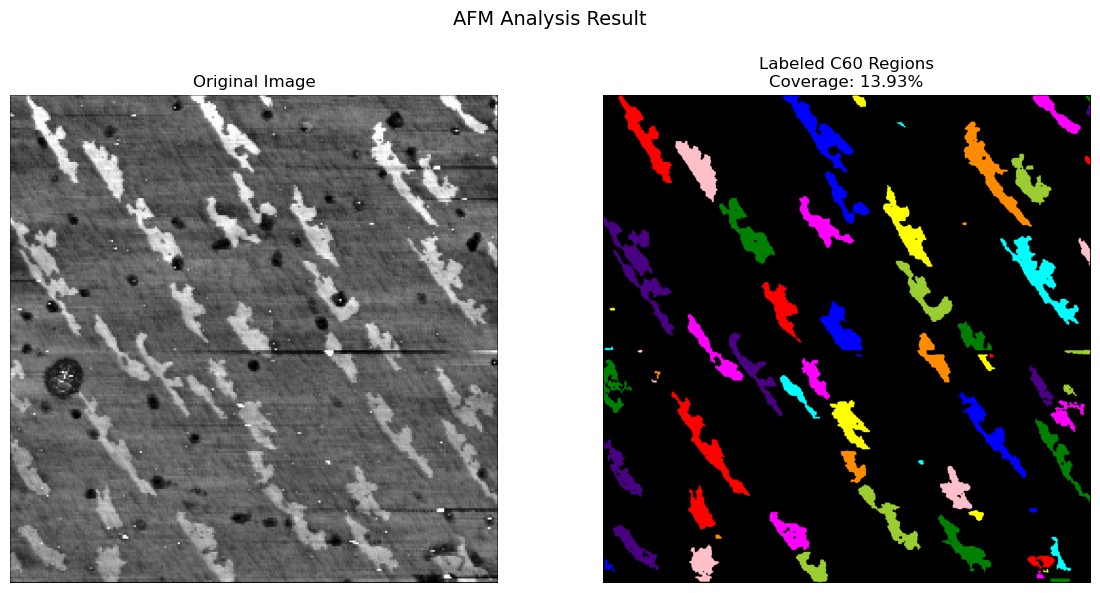

Saved result to: Change_Me0112_13_93_coverage.png


0.139320987654321

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color
import os

def analyze_afm_png(image_path):
    # Load grayscale image
    image = io.imread(image_path, as_gray=True)

    # Normalize image
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Apply Gaussian smoothing
    smoothed = filters.gaussian(norm_image, sigma=1)

    # Otsu thresholding
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Clean small objects
    cleaned = morphology.remove_small_objects(binary, min_size=50)

    # Label regions
    labeled = measure.label(cleaned)
    colored_labels = color.label2rgb(labeled, bg_label=0)

    # Calculate coverage
    coverage = np.sum(cleaned) / cleaned.size

    # Create figure with both images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(norm_image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(colored_labels)
    # Wrap long title using \n
    axes[1].set_title(f"Labeled C60 Regions\nCoverage: {coverage:.2%}")
    axes[1].axis("off")

    # Add overall title (won't get clipped)
    plt.suptitle("AFM Analysis Result", fontsize=14)

    # Tight layout + avoid cropping titles
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Generate output name
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    output_name = f"{base_name}_{coverage:.2%}_coverage".replace('%', '').replace('.', '_') + ".png"

    # Save image with full content
    plt.savefig(output_name, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Saved result to: {output_name}")
    return coverage

# Example usage
analyze_afm_png("Change_Me0112.png")


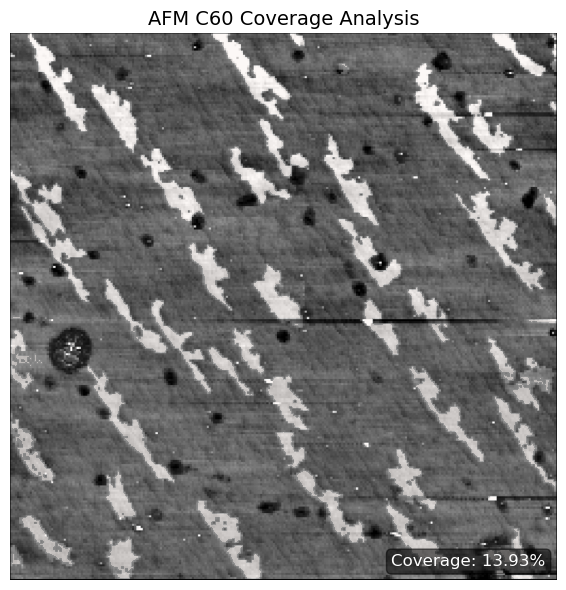

Saved beautified analysis result: Change_Me0112_coverage.png


0.139320987654321

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure
import os

def analyze_afm_png_beautiful(image_path):
    # Load grayscale image
    image = io.imread(image_path, as_gray=True)
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Smooth and threshold
    smoothed = filters.gaussian(norm_image, sigma=1)
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Remove small regions and label
    cleaned = morphology.remove_small_objects(binary, min_size=50)
    coverage = np.sum(cleaned) / cleaned.size

    # Plot beautified image
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(norm_image, cmap='gray')
    ax.imshow(np.ma.masked_where(~cleaned, cleaned), cmap='Reds', alpha=0.4)

    # Display coverage as text in lower right corner
    ax.text(0.98, 0.02,
            f'Coverage: {coverage:.2%}',
            color='white',
            fontsize=12,
            ha='right',
            va='bottom',
            transform=ax.transAxes,
            bbox=dict(facecolor='black', alpha=0.5, boxstyle='round'))

    ax.set_title("AFM C60 Coverage Analysis", fontsize=14)
    ax.axis('off')
    plt.tight_layout()

    # Save figure
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    output_name = f"{base_name}_coverage.png"
    plt.savefig(output_name, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Saved beautified analysis result: {output_name}")
    return coverage

# Example usage
analyze_afm_png_beautiful("Change_Me0112.png")


ValueError: Input array must be at least 2x2.

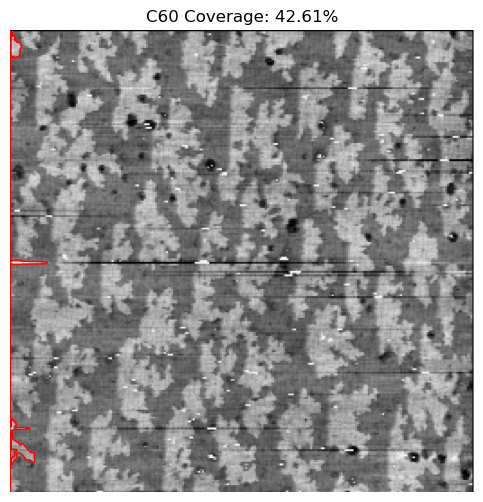

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure
import os

def analyze_afm_png(image_path):
    # Load grayscale image
    image = io.imread(image_path, as_gray=True)

    # Normalize
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Gaussian smoothing
    smoothed = filters.gaussian(norm_image, sigma=1)

    # Otsu thresholding
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Remove noise
    cleaned = morphology.remove_small_objects(binary, min_size=50)

    # Label regions
    labeled = measure.label(cleaned)

    # Compute coverage
    coverage = np.sum(cleaned) / cleaned.size

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(norm_image, cmap='gray')
    ax.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax.axis("off")

    # Overlay region boundaries
    for region in measure.regionprops(labeled):
        # Draw boundary of each region
        for coords in measure.find_contours(region.image, 0.5):
            coords += region.bbox[:2]  # offset to image coords
            ax.plot(coords[:, 1], coords[:, 0], color='red', linewidth=1)

    # Save result
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    output_name = f"{base_name}_coverage.png"
    plt.tight_layout()
    plt.savefig(output_name, dpi=300, bbox_inches='tight')
    plt.show()

    print(f"Saved beautifully clean analysis: {output_name}")
    return coverage

# Example
analyze_afm_png("SiC#6_0000.png")


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color
from skimage.segmentation import find_boundaries
import os

def analyze_afm_png(image_path):
    # Load grayscale AFM image
    image = io.imread(image_path, as_gray=True)

    # Normalize to [0, 1]
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Smooth and threshold
    smoothed = filters.gaussian(norm_image, sigma=1)
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Clean binary image
    cleaned = morphology.remove_small_objects(binary, min_size=50)
    labeled = measure.label(cleaned)
    coverage = np.sum(cleaned) / cleaned.size

    # Prepare base filename
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    ## -------------------------- 1. Label RGB --------------------------
    rgb_labels = color.label2rgb(labeled, bg_label=0, image=norm_image, kind='overlay')

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.imshow(rgb_labels)
    ax1.set_title(f"C60 Labeled Region\nCoverage: {coverage:.2%}")
    ax1.axis("off")
    plt.tight_layout()
    plt.savefig(f"{base_name}_label_rgb.png", dpi=300, bbox_inches='tight')
    plt.close()

    ## -------------------------- 2. Red Contours --------------------------
    fig2, ax2 = plt.subplots(figsize=(6, 6))
    ax2.imshow(norm_image, cmap='gray')
    ax2.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax2.axis("off")

    for region in measure.regionprops(labeled):
        for coords in measure.find_contours(region.image, 0.5):
            coords += region.bbox[:2]
            ax2.plot(coords[:, 1], coords[:, 0], color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(f"{base_name}_contour_overlay.png", dpi=300, bbox_inches='tight')
    plt.close()

    ## -------------------------- 3. Beautified Aesthetic --------------------------
    boundaries = find_boundaries(labeled, mode='outer')
    overlay = np.dstack([norm_image] * 3)  # convert grayscale to RGB

    # Add soft red fill to C60 area
    fill_mask = np.zeros_like(overlay)
    fill_mask[..., 0] = 1.0  # red channel
    fill_mask[..., 1:] = 0.0  # green/blue = 0
    alpha_fill = 0.2
    overlay = (1 - alpha_fill) * overlay + alpha_fill * fill_mask * cleaned[..., np.newaxis]

    # Add red boundary overlay
    overlay[boundaries] = [1.0, 0.0, 0.0]

    fig3, ax3 = plt.subplots(figsize=(6, 6))
    ax3.imshow(overlay)
    ax3.set_title(f"Beautified C60 Overlay\nCoverage: {coverage:.2%}", fontsize=12)
    ax3.axis("off")
    plt.tight_layout()
    plt.savefig(f"{base_name}_beautified.png", dpi=300, bbox_inches='tight')
    plt.close()

    print(f"All views saved for: {base_name}")
    return coverage

# Example usage
analyze_afm_png("Change_Me0112.png")


All views saved for: Change_Me0112


0.139320987654321

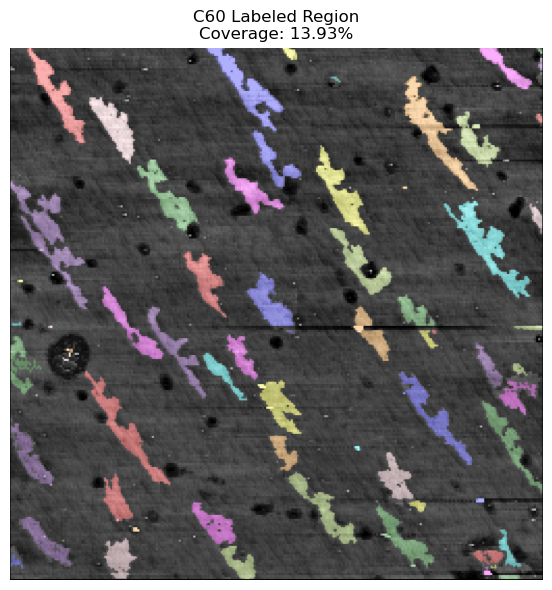

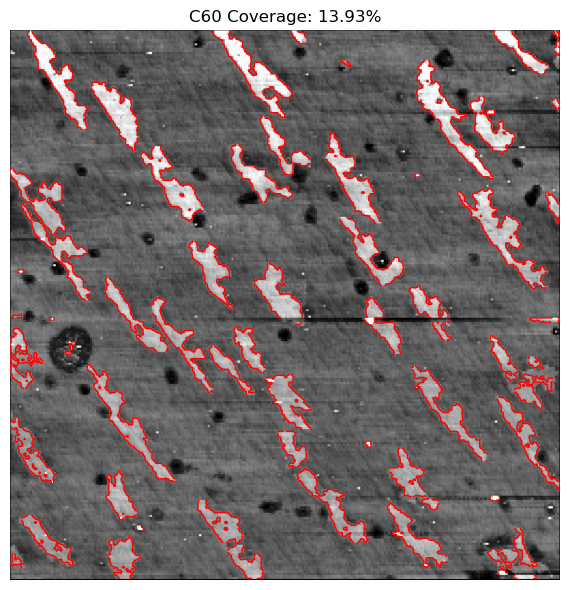

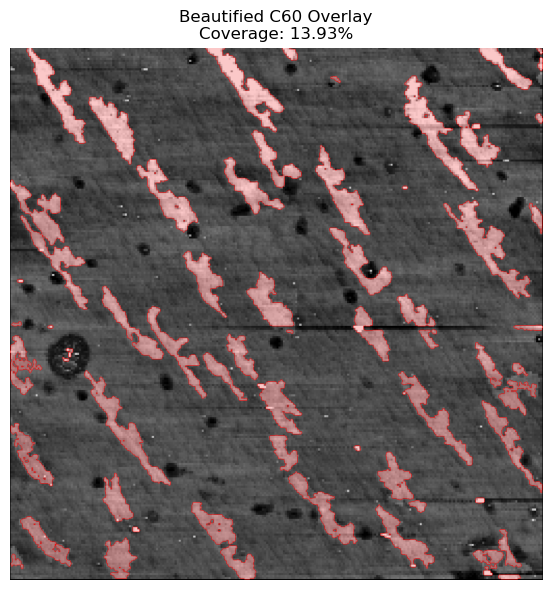

All views saved and shown for: Change_Me0112


0.139320987654321

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color
from skimage.segmentation import find_boundaries
import os

def analyze_afm_png(image_path):
    # Load grayscale AFM image
    image = io.imread(image_path, as_gray=True)

    # Normalize to [0, 1]
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Smooth and threshold
    smoothed = filters.gaussian(norm_image, sigma=1)
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Clean binary image
    cleaned = morphology.remove_small_objects(binary, min_size=50)
    labeled = measure.label(cleaned)
    coverage = np.sum(cleaned) / cleaned.size

    # Prepare base filename
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    ## -------------------------- 1. Label RGB --------------------------
    rgb_labels = color.label2rgb(labeled, bg_label=0, image=norm_image, kind='overlay')

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.imshow(rgb_labels)
    ax1.set_title(f"C60 Labeled Region\nCoverage: {coverage:.2%}")
    ax1.axis("off")
    plt.tight_layout()
    plt.savefig(f"{base_name}_label_rgb.png", dpi=300, bbox_inches='tight')
    plt.show()  # Show preview
    plt.close()

    ## -------------------------- 2. Red Contours --------------------------
    fig2, ax2 = plt.subplots(figsize=(6, 6))
    ax2.imshow(norm_image, cmap='gray')
    ax2.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax2.axis("off")

    for region in measure.regionprops(labeled):
        for coords in measure.find_contours(region.image, 0.5):
            coords += region.bbox[:2]
            ax2.plot(coords[:, 1], coords[:, 0], color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(f"{base_name}_contour_overlay.png", dpi=300, bbox_inches='tight')
    plt.show()  # Show preview
    plt.close()

    ## -------------------------- 3. Beautified Aesthetic --------------------------
    boundaries = find_boundaries(labeled, mode='outer')
    overlay = np.dstack([norm_image] * 3)  # convert grayscale to RGB

    # Add soft red fill to C60 area
    fill_mask = np.zeros_like(overlay)
    fill_mask[..., 0] = 1.0  # red channel
    fill_mask[..., 1:] = 0.0  # green/blue = 0
    alpha_fill = 0.2
    overlay = (1 - alpha_fill) * overlay + alpha_fill * fill_mask * cleaned[..., np.newaxis]

    # Add red boundary overlay
    overlay[boundaries] = [1.0, 0.0, 0.0]

    fig3, ax3 = plt.subplots(figsize=(6, 6))
    ax3.imshow(overlay)
    ax3.set_title(f"Beautified C60 Overlay\nCoverage: {coverage:.2%}", fontsize=12)
    ax3.axis("off")
    plt.tight_layout()
    plt.savefig(f"{base_name}_beautified.png", dpi=300, bbox_inches='tight')
    plt.show()  # Show preview
    plt.close()

    print(f"All views saved and shown for: {base_name}")
    return coverage

# Example usage
analyze_afm_png("Change_Me0112.png")


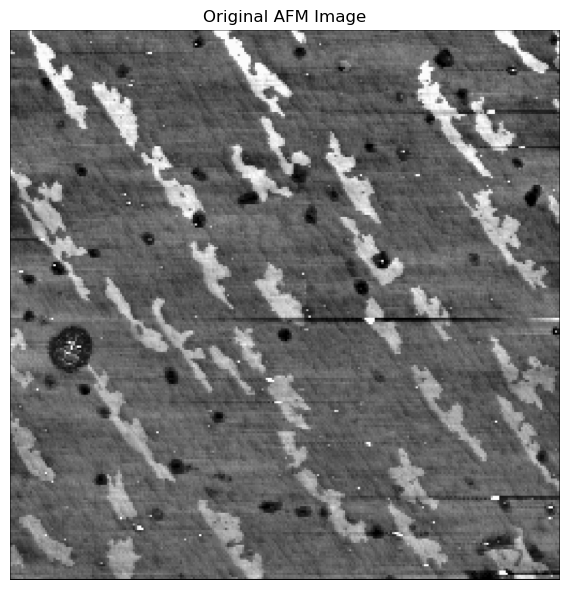

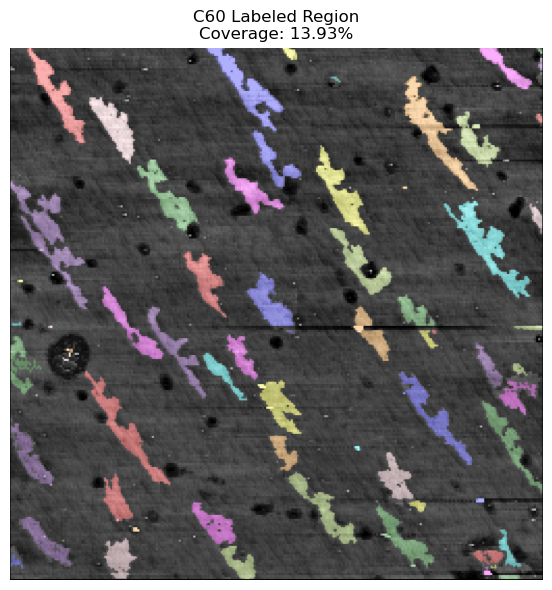

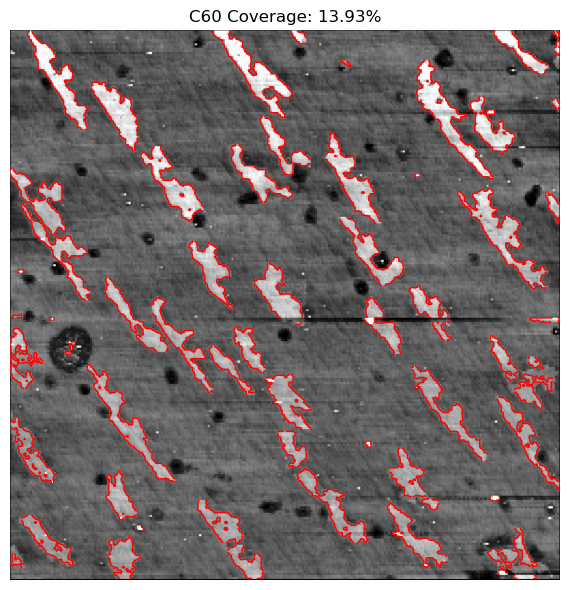

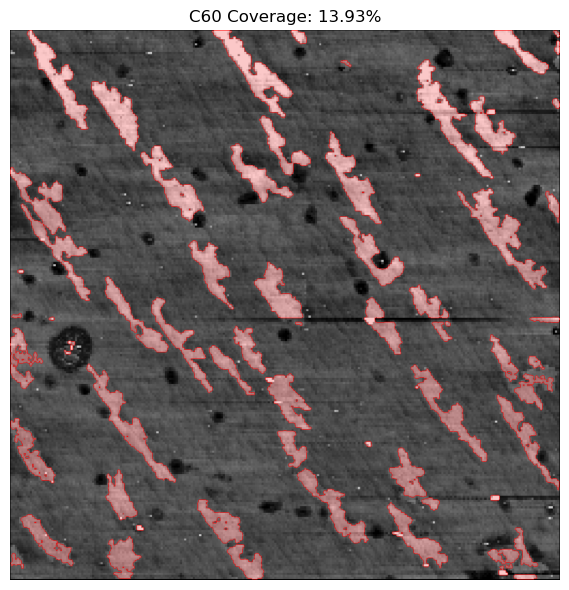

All views saved and shown for: Change_Me0112


0.139320987654321

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color
from skimage.segmentation import find_boundaries
import os

def analyze_afm_png(image_path):
    # Load grayscale AFM image
    image = io.imread(image_path, as_gray=True)

    # Normalize to [0, 1]
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Smooth and threshold
    smoothed = filters.gaussian(norm_image, sigma=1)
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Clean binary image
    cleaned = morphology.remove_small_objects(binary, min_size=50)
    labeled = measure.label(cleaned)
    coverage = np.sum(cleaned) / cleaned.size

    # Prepare base filename
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    ## -------------------------- 0. Original Image --------------------------
    fig0, ax0 = plt.subplots(figsize=(6, 6))
    ax0.imshow(norm_image, cmap='gray')
    ax0.set_title(f"Original AFM Image")
    ax0.axis("off")
    plt.tight_layout()
    plt.savefig(f"{base_name}_original.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 1. Label RGB --------------------------
    rgb_labels = color.label2rgb(labeled, bg_label=0, image=norm_image, kind='overlay')

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.imshow(rgb_labels)
    ax1.set_title(f"C60 Labeled Region\nCoverage: {coverage:.2%}")
    ax1.axis("off")
    plt.tight_layout()
    plt.savefig(f"{base_name}_label_rgb.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 2. Red Contours --------------------------
    fig2, ax2 = plt.subplots(figsize=(6, 6))
    ax2.imshow(norm_image, cmap='gray')
    ax2.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax2.axis("off")

    for region in measure.regionprops(labeled):
        for coords in measure.find_contours(region.image, 0.5):
            coords += region.bbox[:2]
            ax2.plot(coords[:, 1], coords[:, 0], color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(f"{base_name}_contour_overlay.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 3. Beautified Aesthetic --------------------------
    boundaries = find_boundaries(labeled, mode='outer')
    overlay = np.dstack([norm_image] * 3)

    fill_mask = np.zeros_like(overlay)
    fill_mask[..., 0] = 1.0
    fill_mask[..., 1:] = 0.0
    alpha_fill = 0.2
    overlay = (1 - alpha_fill) * overlay + alpha_fill * fill_mask * cleaned[..., np.newaxis]

    overlay[boundaries] = [1.0, 0.0, 0.0]

    fig3, ax3 = plt.subplots(figsize=(6, 6))
    ax3.imshow(overlay)
    ax3.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax3.axis("off")
    plt.tight_layout()
    plt.savefig(f"{base_name}_beautified.png", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    print(f"All views saved and shown for: {base_name}")
    return coverage

# Example usage
analyze_afm_png("Change_Me0112.png")


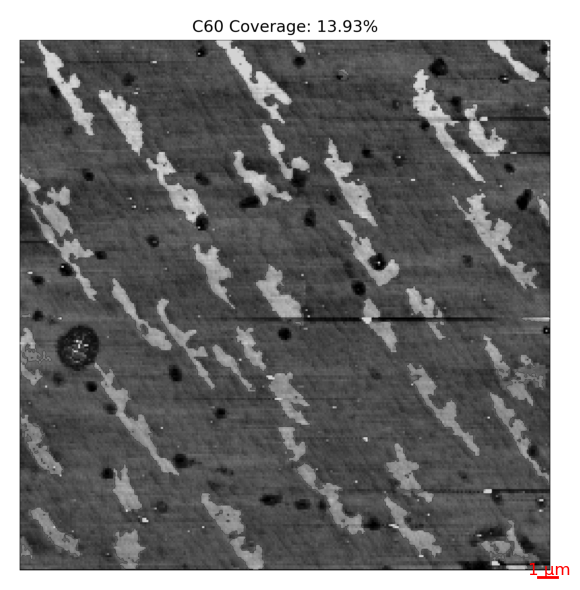

<Figure size 640x480 with 0 Axes>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def add_scale_bar(image_path, real_size_um, scale_length_um=1):
    """
    Add a scale bar to an AFM image.
    
    Parameters:
    - image_path: str, path to the input AFM image
    - real_size_um: float, the real size of the image (in micrometers, e.g., 10.0)
    - scale_length_um: float, the length of the scale bar in real units (default is 1.0)
    """
    # Load the AFM image
    image = io.imread('Change_Me0112_beautified.png', as_gray=True)

    # Get image dimensions
    img_height, img_width = image.shape

    # Calculate pixels per micrometer (assuming square image resolution)
    pixels_per_um = img_width / real_size_um  # assuming image is square, adjust as necessary

    # Calculate the scale bar length in pixels
    scale_length_pixels = scale_length_um * pixels_per_um

    # Create the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    ax.axis('off')

    # Draw the scale bar (bottom-right corner)
    ax.plot([img_width - scale_length_pixels - 10, img_width - 10], [img_height - 10, img_height - 10], 
            color='red', linewidth=2)
    
    # Annotate the scale bar with text
    ax.text(img_width - scale_length_pixels / 2 - 5, img_height - 15,
            f'{scale_length_um} µm', color='red', fontsize=12, ha='center')

    # Show and save the image with scale bar
    plt.tight_layout()
    plt.show()
    plt.savefig(f"{image_path.split('.')[0]}_with_scale.png", dpi=300)

# Example usage: add scale bar to image
image_path = "your_afm_image.png"  # Replace with your image path
real_size_um = 30.0  # Example: the real size of the image is 10 µm
add_scale_bar(image_path, real_size_um)


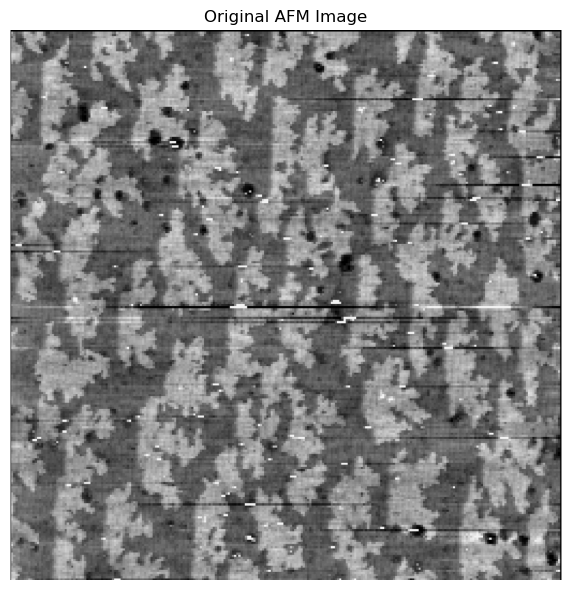

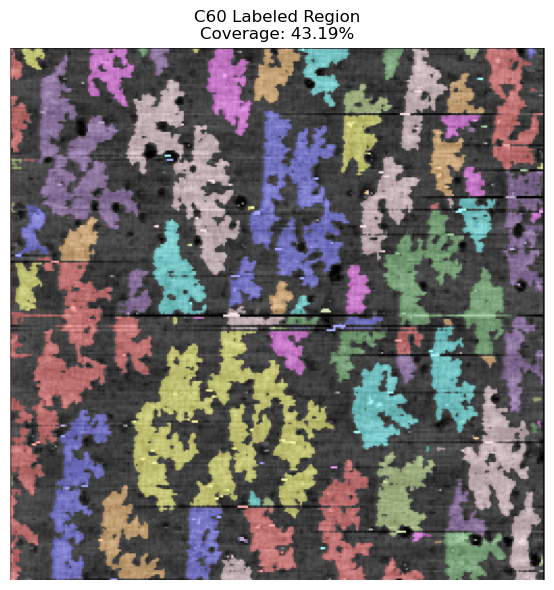

ValueError: Input array must be at least 2x2.

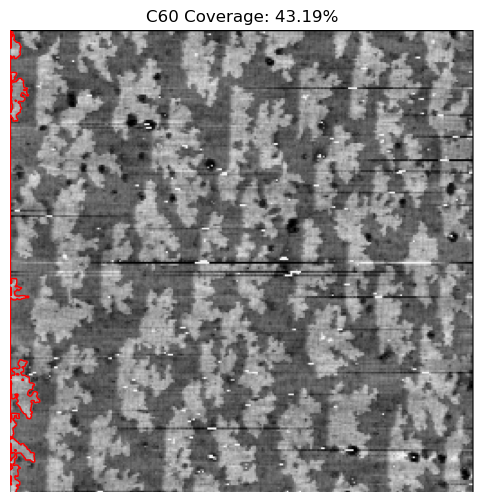

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color
from skimage.segmentation import find_boundaries
import os

def analyze_afm_png(image_path):
    # Load grayscale AFM image
    image = io.imread(image_path, as_gray=True)

    # Normalize to [0, 1]
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Smooth and threshold
    smoothed = filters.gaussian(norm_image, sigma=1)
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Clean binary image
    cleaned = morphology.remove_small_objects(binary, min_size=50)
    labeled = measure.label(cleaned)
    coverage = np.sum(cleaned) / cleaned.size

    # Prepare base filename and create directory
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    save_dir = base_name
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    ## -------------------------- 0. Original Image --------------------------
    fig0, ax0 = plt.subplots(figsize=(6, 6))
    ax0.imshow(norm_image, cmap='gray')
    ax0.set_title(f"Original AFM Image")
    ax0.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_original.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 1. Label RGB --------------------------
    rgb_labels = color.label2rgb(labeled, bg_label=0, image=norm_image, kind='overlay')

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.imshow(rgb_labels)
    ax1.set_title(f"C60 Labeled Region\nCoverage: {coverage:.2%}")
    ax1.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_label_rgb.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 2. Red Contours --------------------------
    fig2, ax2 = plt.subplots(figsize=(6, 6))
    ax2.imshow(norm_image, cmap='gray')
    ax2.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax2.axis("off")

    for region in measure.regionprops(labeled):
        for coords in measure.find_contours(region.image, 0.5):
            coords += region.bbox[:2]
            ax2.plot(coords[:, 1], coords[:, 0], color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_contour_overlay.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 3. Beautified Aesthetic --------------------------
    boundaries = find_boundaries(labeled, mode='outer')
    overlay = np.dstack([norm_image] * 3)

    fill_mask = np.zeros_like(overlay)
    fill_mask[..., 0] = 1.0
    fill_mask[..., 1:] = 0.0
    alpha_fill = 0.2
    overlay = (1 - alpha_fill) * overlay + alpha_fill * fill_mask * cleaned[..., np.newaxis]

    overlay[boundaries] = [1.0, 0.0, 0.0]

    fig3, ax3 = plt.subplots(figsize=(6, 6))
    ax3.imshow(overlay)
    ax3.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax3.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_beautified.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    print(f"All views saved and shown for: {base_name}")
    return coverage

# Example usage
analyze_afm_png("SiC#6_0000.png")


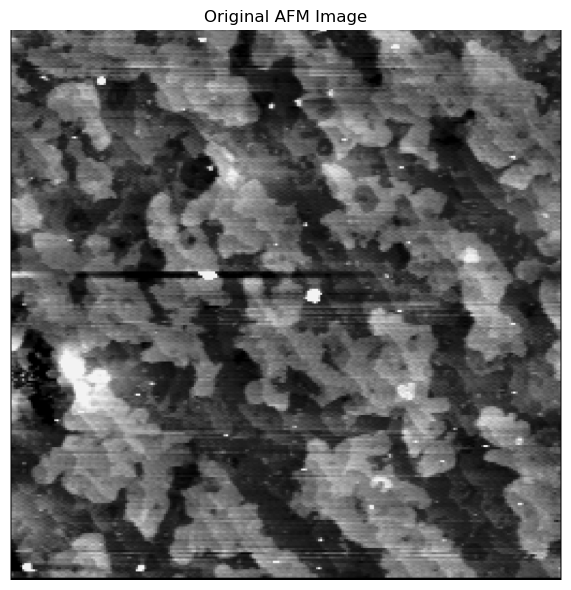

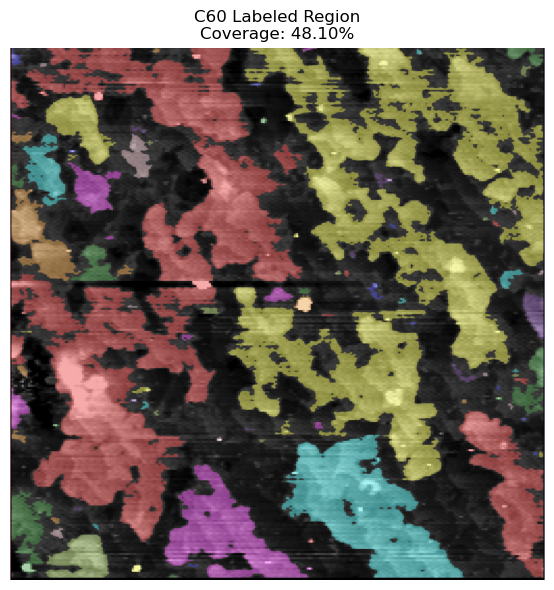

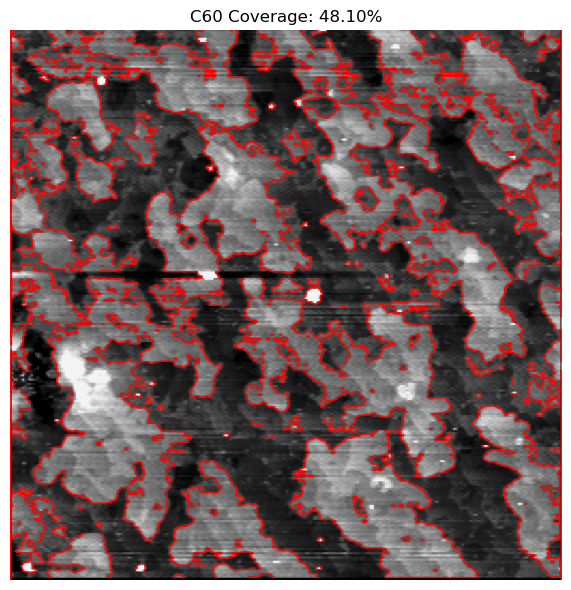

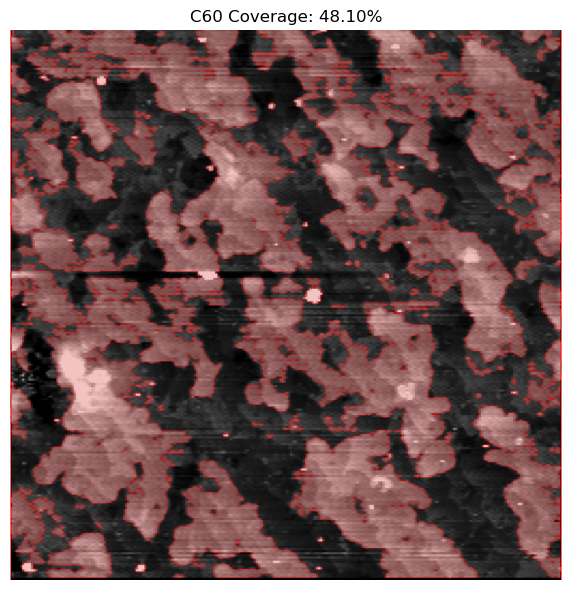

All views saved and shown for: SiC#11_0005


0.4810270602706027

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, color
from skimage.segmentation import find_boundaries
import os

def analyze_afm_png(image_path):
    # Load grayscale AFM image
    image = io.imread(image_path, as_gray=True)

    # Normalize to [0, 1]
    norm_image = (image - np.min(image)) / (np.max(image) - np.min(image))

    # Smooth and threshold
    smoothed = filters.gaussian(norm_image, sigma=1)
    thresh = filters.threshold_otsu(smoothed)
    binary = smoothed > thresh

    # Clean binary image
    cleaned = morphology.remove_small_objects(binary, min_size=50)
    labeled = measure.label(cleaned)
    coverage = np.sum(cleaned) / cleaned.size

    # Prepare base filename and create directory
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    save_dir = base_name
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    ## -------------------------- 0. Original Image --------------------------
    fig0, ax0 = plt.subplots(figsize=(6, 6))
    ax0.imshow(norm_image, cmap='gray')
    ax0.set_title(f"Original AFM Image")
    ax0.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_original.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 1. Label RGB --------------------------
    rgb_labels = color.label2rgb(labeled, bg_label=0, image=norm_image, kind='overlay')

    fig1, ax1 = plt.subplots(figsize=(6, 6))
    ax1.imshow(rgb_labels)
    ax1.set_title(f"C60 Labeled Region\nCoverage: {coverage:.2%}")
    ax1.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_label_rgb.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 2. Red Contours --------------------------
    fig2, ax2 = plt.subplots(figsize=(6, 6))
    ax2.imshow(norm_image, cmap='gray')
    ax2.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax2.axis("off")

    for region in measure.regionprops(labeled):
        # 修复：跳过尺寸太小的区域，防止 find_contours 报错
        if region.image.shape[0] < 2 or region.image.shape[1] < 2:
            continue
        for coords in measure.find_contours(region.image, 0.5):
            coords += region.bbox[:2]
            ax2.plot(coords[:, 1], coords[:, 0], color='red', linewidth=1)

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_contour_overlay.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    ## -------------------------- 3. Beautified Aesthetic --------------------------
    boundaries = find_boundaries(labeled, mode='outer')
    overlay = np.dstack([norm_image] * 3)

    fill_mask = np.zeros_like(overlay)
    fill_mask[..., 0] = 1.0
    fill_mask[..., 1:] = 0.0
    alpha_fill = 0.2
    overlay = (1 - alpha_fill) * overlay + alpha_fill * fill_mask * cleaned[..., np.newaxis]

    overlay[boundaries] = [1.0, 0.0, 0.0]

    fig3, ax3 = plt.subplots(figsize=(6, 6))
    ax3.imshow(overlay)
    ax3.set_title(f"C60 Coverage: {coverage:.2%}", fontsize=12)
    ax3.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f"{base_name}_beautified.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    print(f"All views saved and shown for: {base_name}")
    return coverage

# Example usage
analyze_afm_png("SiC#11_0005.png")
